# GROUP#: 9738
## GWP 1
Course: Financial Econometrics

# Problem 1: Omitted Variable Bias Analysis

## Step 1: Import necessary libraries

This step imports NumPy, Statsmodels, and Matplotlib for data generation, regression, and visualization.


In [18]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Step 2: Set the random seed for reproducibility

This ensures your results are the same every time you run the notebook.

In [19]:
np.random.seed(0)

## Step 3: Initialize sample sizes and lists to collect regression coefficients

We define the sample sizes and lists to store the coefficient estimates from each model.

In [20]:
ns = [100, 1000, 5000]
betas_full = []
betas_red = []

## Step 4: Loop through each sample size, simulate data, and run regressions

For each n, generate X and Z (correlated), simulate Y, fit both the full and reduced regression models, and print the coefficients.

n=100: full β̂ = 2.0078,  reduced β̂ = 4.6784


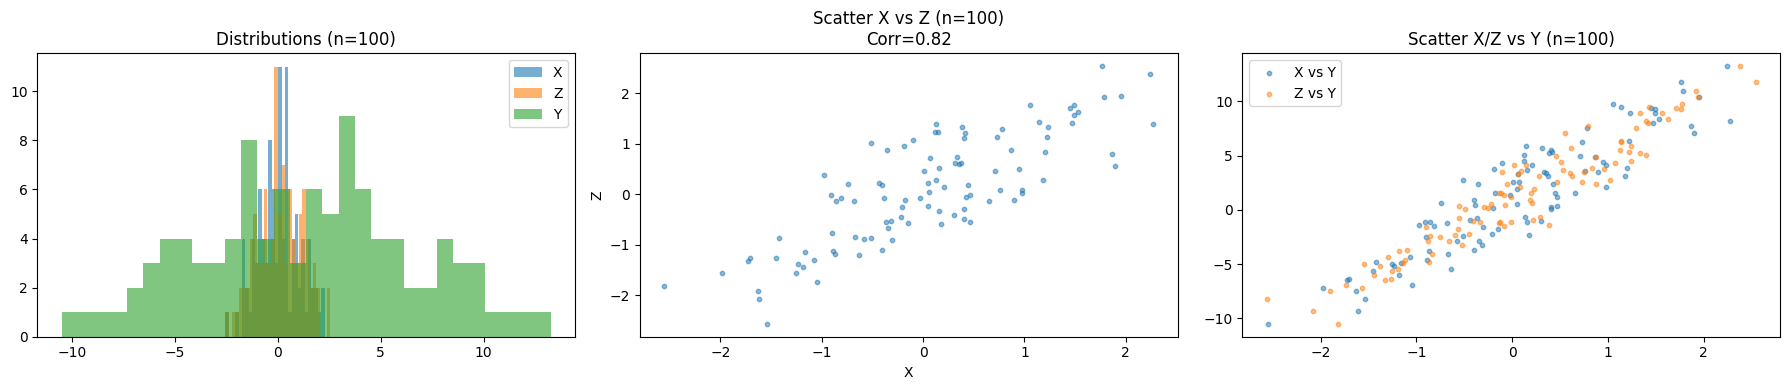

n=1000: full β̂ = 1.9383,  reduced β̂ = 4.2942


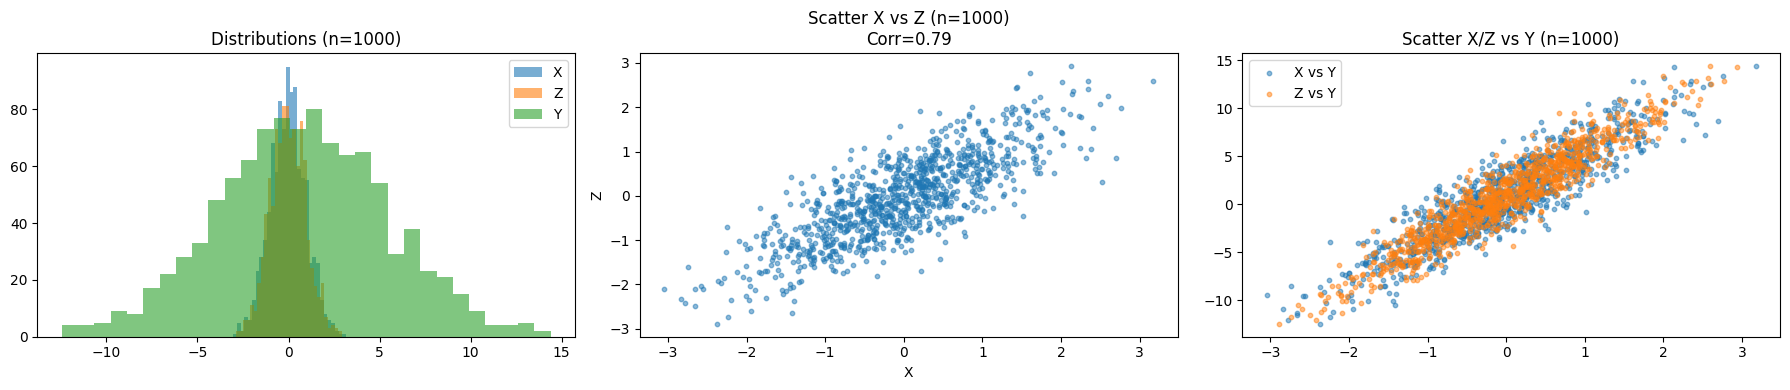

n=5000: full β̂ = 2.0099,  reduced β̂ = 4.3734


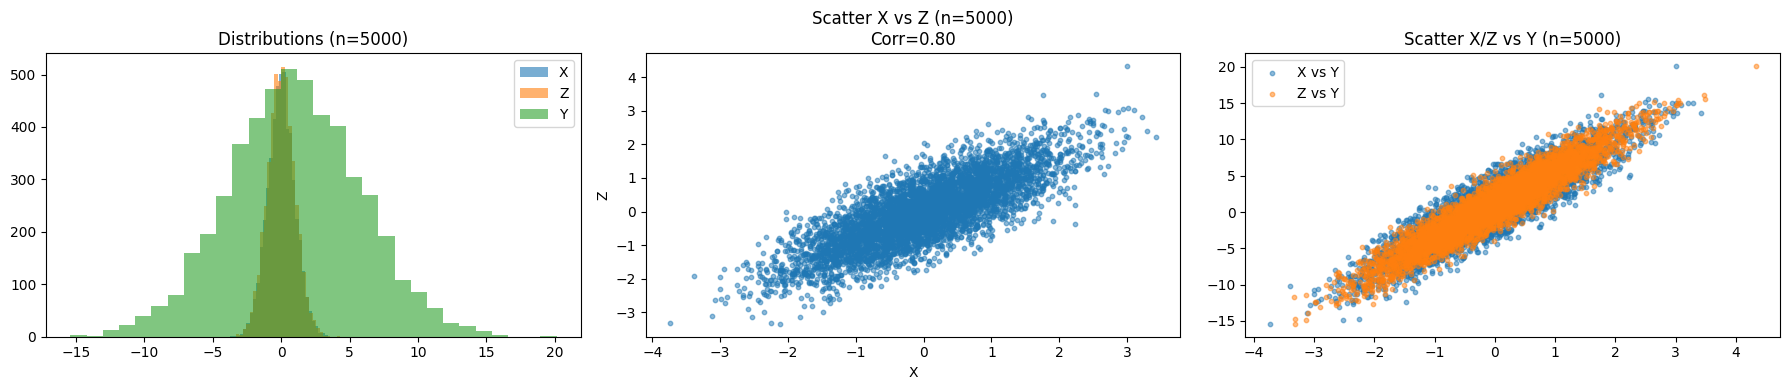

In [21]:
for i, n in enumerate(ns):
    a, b, c = 1.0, 2.0, 3.0
    X = np.random.normal(size=n)
    # Let Z = 0.8*X + independent noise => Corr(X,Z) ≈ 0.8
    Z = 0.8*X + np.random.normal(scale=np.sqrt(1-0.8**2), size=n)
    e = np.random.normal(size=n)
    Y = a + b*X + c*Z + e

    # Full model with X and Z
    X_full = sm.add_constant(np.column_stack((X, Z)))
    model_full = sm.OLS(Y, X_full).fit()
    # Reduced model with X only
    X_red = sm.add_constant(X)
    model_red = sm.OLS(Y, X_red).fit()

    print(f"n={n}: full β̂ = {model_full.params[1]:.4f},  reduced β̂ = {model_red.params[1]:.4f}")

    # Save beta values for summary plot
    betas_full.append(model_full.params[1])
    betas_red.append(model_red.params[1])

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    axs[0].hist(X, bins=30, alpha=0.6, label="X")
    axs[0].hist(Z, bins=30, alpha=0.6, label="Z")
    axs[0].hist(Y, bins=30, alpha=0.6, label="Y")
    axs[0].set_title(f'Distributions (n={n})')
    axs[0].legend()

    axs[1].scatter(X, Z, alpha=0.5, s=10)
    axs[1].set_title(f'Scatter X vs Z (n={n})\nCorr={np.corrcoef(X, Z)[0,1]:.2f}')
    axs[1].set_xlabel("X")
    axs[1].set_ylabel("Z")

    axs[2].scatter(X, Y, alpha=0.5, s=10, label='X vs Y')
    axs[2].scatter(Z, Y, alpha=0.5, s=10, label='Z vs Y')
    axs[2].set_title(f'Scatter X/Z vs Y (n={n})')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

## Step 5: Plot a summary bar chart of β̂ estimates for each model and sample size

This final plot compares the estimated coefficient for X from the full and reduced models across all sample sizes.


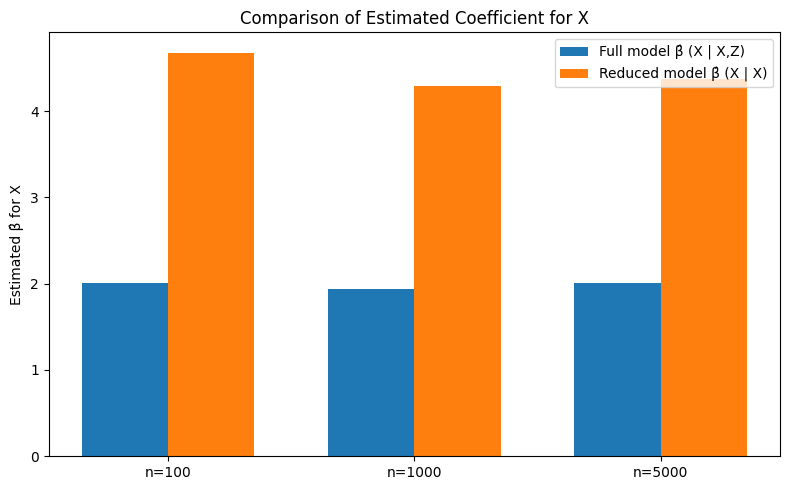

In [22]:
x_ticks = np.arange(len(ns))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x_ticks - width/2, betas_full, width, label="Full model β̂ (X | X,Z)")
ax.bar(x_ticks + width/2, betas_red, width, label="Reduced model β̂ (X | X)")
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"n={n}" for n in ns])
ax.set_ylabel("Estimated β̂ for X")
ax.set_title("Comparison of Estimated Coefficient for X")
ax.legend()
plt.tight_layout()
plt.show()


# Problem 2: Outlier Analysis in Regression Models

## Step 1: Import libraries

Import numpy for numerical operations, statsmodels for regression, and matplotlib for plotting.

In [23]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Step 2: Simulate data

Generate the predictor X, irrelevant noise W, and outcome Y using a simple linear model with added noise.


In [24]:
np.random.seed(2)
n = 500
X = np.random.normal(size=n)
W = np.random.normal(size=n)         # irrelevant noise
Y = 1 + 2*X + np.random.normal(size=n)

## Step 3: Fit two regression models

Fit one model with X only and one with both X and irrelevant noise W. Print the coefficients and standard errors for X.


In [25]:
# Model 1: Y ~ X
X1 = sm.add_constant(X)
m1 = sm.OLS(Y, X1).fit()

# Model 2: Y ~ X + W
X2 = sm.add_constant(np.column_stack((X, W)))
m2 = sm.OLS(Y, X2).fit()

print("β-hat without W:", m1.params[1], " SE:", m1.bse[1])
print("β-hat with W:   ", m2.params[1], " SE:", m2.bse[1])


β-hat without W: 2.0058728708121922  SE: 0.04284937633892059
β-hat with W:    2.0074688812079966  SE: 0.04291986220938287


## Step 4: Visualize the distributions of X, W, and Y

Show histograms of the predictor, irrelevant noise, and response variable to check for normality and variance.


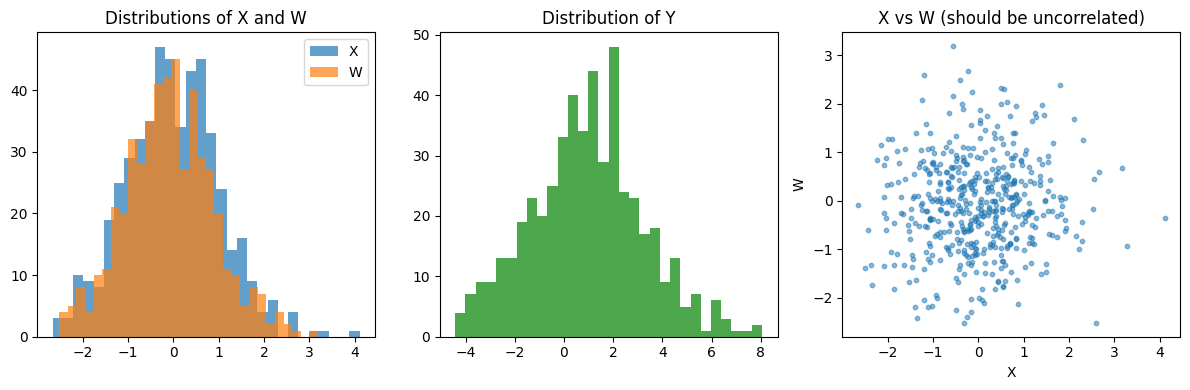

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(X, bins=30, alpha=0.7, label='X')
plt.hist(W, bins=30, alpha=0.7, label='W')
plt.title("Distributions of X and W")
plt.legend()

plt.subplot(1,3,2)
plt.hist(Y, bins=30, alpha=0.7, color='g')
plt.title("Distribution of Y")

plt.subplot(1,3,3)
plt.scatter(X, W, alpha=0.5, s=10)
plt.xlabel('X')
plt.ylabel('W')
plt.title('X vs W (should be uncorrelated)')
plt.tight_layout()
plt.show()


## Step 5: Visualize the relationship of X and W with Y

Scatter plots of X vs Y (the real signal) and W vs Y (should show no pattern, confirming W is irrelevant).


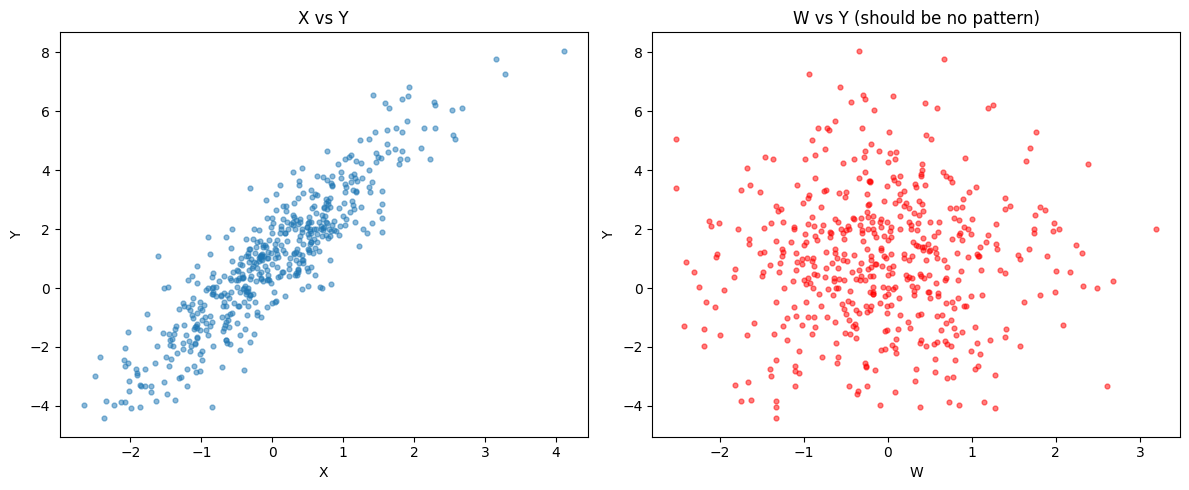

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X, Y, alpha=0.5, s=12)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')

plt.subplot(1,2,2)
plt.scatter(W, Y, alpha=0.5, s=12, color='r')
plt.xlabel('W')
plt.ylabel('Y')
plt.title('W vs Y (should be no pattern)')
plt.tight_layout()
plt.show()


## Step 6: Compare the estimated coefficients and standard errors for X

A bar plot with error bars visualizes the effect (or lack thereof) of including W in the regression model.


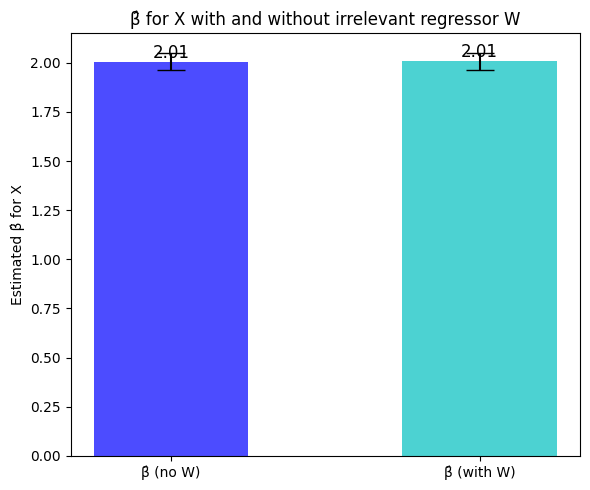

In [28]:
labels = ["β̂ (no W)", "β̂ (with W)"]
betas = [m1.params[1], m2.params[1]]
ses = [m1.bse[1], m2.bse[1]]

x = np.arange(2)
width = 0.5

fig, ax = plt.subplots(figsize=(6,5))
bars = ax.bar(x, betas, width, yerr=ses, capsize=10, color=['b', 'c'], alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Estimated β̂ for X")
ax.set_title("β̂ for X with and without irrelevant regressor W")
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=12)
plt.tight_layout()
plt.show()


# Problem 3: Model Selection on Assigned Dataset

## Step 1: Import Libraries

Import required Python libraries for data analysis, visualization, and statistical computations.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

## Step 2: Define Data Loading Function

Define a function to load and preprocess the dataset, mapping column names to a standard format.

In [30]:
def load_model_selection_data(filepath):
    data = pd.read_csv(filepath)
    print(f"Original columns: {list(data.columns)}")
    column_mapping = {}
    if 'Y' in data.columns:
        column_mapping['Y'] = 'y'
    elif 'y' in data.columns:
        column_mapping['y'] = 'y'
    for i in range(1, 6):
        z_col = f'Z{i}'
        x_col = f'x{i}'
        if z_col in data.columns:
            column_mapping[z_col] = x_col
        elif f'Z{i} ' in data.columns:
            column_mapping[f'Z{i} '] = x_col
        elif x_col in data.columns:
            column_mapping[x_col] = x_col
    data = data.rename(columns=column_mapping)
    data.columns = data.columns.str.strip()
    required_cols = ['y', 'x1', 'x2', 'x3', 'x4', 'x5']
    missing_cols = [col for col in required_cols if col not in data.columns]
    if missing_cols:
        print(f"Warning: Missing columns {missing_cols}")
        print(f"Available columns: {list(data.columns)}")
    available_cols = list(data.columns)
    if len(available_cols) >= 6:
        new_names = ['y', 'x1', 'x2', 'x3', 'x4', 'x5']
        data.columns = new_names[:len(available_cols)]
    final_cols = ['y', 'x1', 'x2', 'x3', 'x4', 'x5']
    available_final_cols = [col for col in final_cols if col in data.columns]
    data = data[available_final_cols]
    print(f"Final dataset columns: {list(data.columns)}")
    print(f"Dataset shape: {data.shape}")
    return data

## Step 3: Define Metrics Calculation Function
Define a function to compute regression metrics for a given design matrix and response variable.

In [31]:
def calculate_model_metrics(X, y):
    n, k = X.shape
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    y_fitted = X @ coeffs
    residuals = y - y_fitted
    rss = np.sum(residuals**2)
    tss = np.sum((y - np.mean(y))**2)
    r_squared = 1 - rss/tss
    adj_r_squared = 1 - (rss/(n-k)) / (tss/(n-1))
    log_likelihood = -n/2 * (np.log(2*np.pi) + np.log(rss/n) + 1)
    aic = 2*k - 2*log_likelihood
    bic = k*np.log(n) - 2*log_likelihood
    mse = rss / (n - k)
    var_coeff = mse * np.linalg.inv(X.T @ X)
    se_coeffs = np.sqrt(np.diag(var_coeff))
    t_stats = coeffs / se_coeffs
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), n - k))
    return {
        'coefficients': coeffs,
        'se_coefficients': se_coeffs,
        't_statistics': t_stats,
        'p_values': p_values,
        'r_squared': r_squared,
        'adj_r_squared': adj_r_squared,
        'aic': aic,
        'bic': bic,
        'rss': rss,
        'log_likelihood': log_likelihood,
        'residuals': residuals,
        'n_obs': n,
        'n_params': k
    }

## Step 4: Define Exhaustive Model Selection Function
Define a function to perform exhaustive model selection by evaluating all possible variable subsets.

In [32]:
def exhaustive_model_selection(data):
    y = data['y'].values
    variable_names = [col for col in ['x1', 'x2', 'x3', 'x4', 'x5'] if col in data.columns]
    n_vars = len(variable_names)
    print(f"Performing exhaustive search over {2**n_vars - 1} possible models...")
    results = []
    for r in range(1, n_vars + 1):
        for combo in combinations(range(n_vars), r):
            selected_vars = [variable_names[i] for i in combo]
            X_subset = data[selected_vars].values
            X_design = np.column_stack([np.ones(len(y)), X_subset])
            try:
                metrics = calculate_model_metrics(X_design, y)
                results.append({
                    'variables': selected_vars,
                    'n_vars': len(selected_vars),
                    'variable_indices': combo,
                    'aic': metrics['aic'],
                    'bic': metrics['bic'],
                    'adj_r_squared': metrics['adj_r_squared'],
                    'r_squared': metrics['r_squared'],
                    'coefficients': metrics['coefficients'],
                    'se_coefficients': metrics['se_coefficients'],
                    't_statistics': metrics['t_statistics'],
                    'p_values': metrics['p_values'],
                    'rss': metrics['rss'],
                    'log_likelihood': metrics['log_likelihood']
                })
            except np.linalg.LinAlgError:
                continue
    return pd.DataFrame(results)

## Step 5: Define Forward Selection Function
Define a function to perform forward stepwise selection, adding variables based on p-value significance.

In [33]:
def forward_selection(data, entry_p=0.05):
    y = data['y'].values
    variable_names = [col for col in ['x1', 'x2', 'x3', 'x4', 'x5'] if col in data.columns]
    n = len(y)
    selected_vars = []
    remaining_vars = variable_names.copy()
    print("\nForward Selection Process:")
    print("=" * 50)
    step = 1
    while remaining_vars:
        best_var = None
        best_p = float('inf')
        best_metrics = None
        for var in remaining_vars:
            test_vars = selected_vars + [var]
            X_test = data[test_vars].values
            X_design = np.column_stack([np.ones(n), X_test])
            try:
                metrics = calculate_model_metrics(X_design, y)
                new_var_p = metrics['p_values'][-1]
                if new_var_p < best_p:
                    best_p = new_var_p
                    best_var = var
                    best_metrics = metrics
            except np.linalg.LinAlgError:
                continue
        if best_var and best_p < entry_p:
            selected_vars.append(best_var)
            remaining_vars.remove(best_var)
            print(f"Step {step}: Added {best_var}")
            print(f" P-value: {best_p:.4f}")
            print(f" AIC: {best_metrics['aic']:.3f}")
            print(f" BIC: {best_metrics['bic']:.3f}")
            print(f" Adj R²: {best_metrics['adj_r_squared']:.4f}")
            step += 1
        else:
            break
    print(f"\nForward selection result: {selected_vars}")
    return selected_vars

## Step 6: Define Backward Elimination Function
Define a function to perform backward elimination, removing variables based on p-value significance.

In [34]:
def backward_elimination(data, exit_p=0.10):
    y = data['y'].values
    variable_names = [col for col in ['x1', 'x2', 'x3', 'x4', 'x5'] if col in data.columns]
    n = len(y)
    selected_vars = variable_names.copy()
    print("\nBackward Elimination Process:")
    print("=" * 50)
    step = 1
    while len(selected_vars) > 1:
        worst_var = None
        worst_p = 0
        X_current = data[selected_vars].values
        X_current_design = np.column_stack([np.ones(n), X_current])
        try:
            current_metrics = calculate_model_metrics(X_current_design, y)
            for i, var in enumerate(selected_vars):
                var_p = current_metrics['p_values'][i + 1]
                if var_p > worst_p:
                    worst_p = var_p
                    worst_var = var
            if worst_var and worst_p > exit_p:
                selected_vars.remove(worst_var)
                print(f"Step {step}: Removed {worst_var}")
                print(f" P-value: {worst_p:.4f}")
                if selected_vars:
                    X_new = data[selected_vars].values
                    X_new_design = np.column_stack([np.ones(n), X_new])
                    new_metrics = calculate_model_metrics(X_new_design, y)
                    print(f" AIC: {new_metrics['aic']:.3f}")
                    print(f" BIC: {new_metrics['bic']:.3f}")
                    print(f" Adj R²: {new_metrics['adj_r_squared']:.4f}")
                step += 1
            else:
                break
        except np.linalg.LinAlgError:
            break
    print(f"\nBackward elimination result: {selected_vars}")
    return selected_vars

## Step 7: Define Results Analysis Function
Define a function to analyze and summarize model selection results based on AIC, BIC, and adjusted R².

In [35]:
def analyze_model_selection_results(results_df):
    best_aic_idx = results_df['aic'].idxmin()
    best_bic_idx = results_df['bic'].idxmin()
    best_adj_r2_idx = results_df['adj_r_squared'].idxmax()
    best_models = {
        'AIC': results_df.loc[best_aic_idx],
        'BIC': results_df.loc[best_bic_idx],
        'Adj_R2': results_df.loc[best_adj_r2_idx]
    }
    print("\n" + "="*80)
    print("MODEL SELECTION RESULTS SUMMARY")
    print("="*80)
    for criterion, model in best_models.items():
        print(f"\nBest model according to {criterion}:")
        print(f"Variables: {model['variables']}")
        print(f"Number of variables: {model['n_vars']}")
        print(f"AIC: {model['aic']:.3f}")
        print(f"BIC: {model['bic']:.3f}")
        print(f"Adj R²: {model['adj_r_squared']:.4f}")
        print(f"R²: {model['r_squared']:.4f}")
        print(f"RSS: {model['rss']:.3f}")
    return best_models

## Step 8: Define Plotting Function
Define a function to create comprehensive visualizations for model selection analysis.

In [36]:
def create_comprehensive_model_plots(results_df, data):
    """Create comprehensive plots for model selection analysis"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comprehensive Model Selection Analysis', fontsize=16, fontweight='bold')

    # Plot 1: AIC vs Number of Variables
    aic_by_nvars = results_df.groupby('n_vars')['aic'].agg(['min', 'mean', 'max'])
    axes[0, 0].plot(aic_by_nvars.index, aic_by_nvars['min'], 'bo-', label='Minimum AIC', linewidth=2)
    axes[0, 0].fill_between(aic_by_nvars.index, aic_by_nvars['min'], aic_by_nvars['max'], alpha=0.3)
    axes[0, 0].set_xlabel('Number of Variables')
    axes[0, 0].set_ylabel('AIC')
    axes[0, 0].set_title('AIC vs Model Complexity')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Highlight best AIC model
    best_aic_idx = results_df['aic'].idxmin()
    best_aic_nvars = results_df.loc[best_aic_idx, 'n_vars']
    best_aic_value = results_df.loc[best_aic_idx, 'aic']
    axes[0, 0].scatter([best_aic_nvars], [best_aic_value], color='red', s=100, marker='*', zorder=5)

    # Plot 2: BIC vs Number of Variables
    bic_by_nvars = results_df.groupby('n_vars')['bic'].agg(['min', 'mean', 'max'])
    axes[0, 1].plot(bic_by_nvars.index, bic_by_nvars['min'], 'ro-', label='Minimum BIC', linewidth=2)
    axes[0, 1].fill_between(bic_by_nvars.index, bic_by_nvars['min'], bic_by_nvars['max'], alpha=0.3, color='red')
    axes[0, 1].set_xlabel('Number of Variables')
    axes[0, 1].set_ylabel('BIC')
    axes[0, 1].set_title('BIC vs Model Complexity')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Highlight best BIC model
    best_bic_idx = results_df['bic'].idxmin()
    best_bic_nvars = results_df.loc[best_bic_idx, 'n_vars']
    best_bic_value = results_df.loc[best_bic_idx, 'bic']
    axes[0, 1].scatter([best_bic_nvars], [best_bic_value], color='blue', s=100, marker='s', zorder=5)

    # Plot 3: Adjusted R² vs Number of Variables
    adjr2_by_nvars = results_df.groupby('n_vars')['adj_r_squared'].agg(['min', 'mean', 'max'])
    axes[0, 2].plot(adjr2_by_nvars.index, adjr2_by_nvars['max'], 'go-', label='Maximum Adj R²', linewidth=2)
    # Corrected variable name 'adjr' and typo 'SIX_by_nvars'
    axes[0, 2].fill_between(adjr2_by_nvars.index, adjr2_by_nvars['min'], adjr2_by_nvars['max'], alpha=0.3, color='green')
    axes[0, 2].set_xlabel('Number of Variables')
    axes[0, 2].set_ylabel('Adjusted R²')
    axes[0, 2].set_title('Adjusted R² vs Model Complexity')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)

    # Highlight best Adjusted R² model
    best_adjr2_idx = results_df['adj_r_squared'].idxmax()
    best_adjr2_nvars = results_df.loc[best_adjr2_idx, 'n_vars']
    best_adjr2_value = results_df.loc[best_adjr2_idx, 'adj_r_squared']
    axes[0, 2].scatter([best_adjr2_nvars], [best_adjr2_value], color='purple', s=100, marker='^', zorder=5)

    # Plot 4: AIC vs BIC Trade-off
    scatter = axes[1, 0].scatter(results_df['aic'], results_df['bic'], alpha=0.6, c=results_df['n_vars'], cmap='viridis', s=50)
    axes[1, 0].scatter(results_df.loc[best_aic_idx, 'aic'], results_df.loc[best_aic_idx, 'bic'], color='red', s=100, marker='*', label='Best AIC', zorder=5)
    axes[1, 0].scatter(results_df.loc[best_bic_idx, 'aic'], results_df.loc[best_bic_idx, 'bic'], color='blue', s=100, marker='s', label='Best BIC', zorder=5)
    axes[1, 0].set_xlabel('AIC')
    axes[1, 0].set_ylabel('BIC')
    axes[1, 0].set_title('AIC vs BIC Trade-off')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=axes[1, 0])
    cbar.set_label('Number of Variables')

    # Plot 5: Distribution of Adjusted R²
    axes[1, 1].hist(results_df['adj_r_squared'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1, 1].axvline(results_df['adj_r_squared'].mean(), color='red', linestyle='--', label='Mean')
    axes[1, 1].axvline(results_df.loc[best_adjr2_idx, 'adj_r_squared'], color='green', linestyle='-', linewidth=2, label='Best')
    axes[1, 1].set_xlabel('Adjusted R²')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Distribution of Model Performance')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # Plot 6: Variable Correlation Matrix
    # Ensure all required columns are present in data before calculating correlation
    required_corr_cols = ['y', 'x1', 'x2', 'x3', 'x4', 'x5']
    available_corr_cols = [col for col in required_corr_cols if col in data.columns]
    correlation_matrix = data[available_corr_cols].corr()

    im = axes[1, 2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    axes[1, 2].set_xticks(range(len(correlation_matrix.columns)))
    axes[1, 2].set_yticks(range(len(correlation_matrix.columns)))
    axes[1, 2].set_xticklabels(correlation_matrix.columns)
    axes[1, 2].set_yticklabels(correlation_matrix.columns)
    axes[1, 2].set_title('Variable Correlation Matrix')

    # Add correlation values on the heatmap
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            text = axes[1, 2].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha="center", va="center", color="black", fontsize=8)

    cbar2 = plt.colorbar(im, ax=axes[1, 2])
    cbar2.set_label('Correlation Coefficient')

    plt.tight_layout()
    plt.savefig('comprehensive_model_selection_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

## Step 9: Define Detailed Model Analysis Function
Define a function to perform a detailed analysis of the selected model, including parameter estimates.

In [37]:
def detailed_model_analysis(data, selected_vars):
    print(f"\n" + "="*80)
    print("DETAILED ANALYSIS OF SELECTED MODEL")
    print("="*80)
    y = data['y'].values
    X_selected = data[selected_vars].values
    X_design = np.column_stack([np.ones(len(y)), X_selected])
    metrics = calculate_model_metrics(X_design, y)
    print(f"Selected variables: {selected_vars}")
    print(f"Number of observations: {metrics['n_obs']}")
    print(f"Number of parameters: {metrics['n_params']}")
    print(f"\nModel Performance Metrics:")
    print(f"R²: {metrics['r_squared']:.4f}")
    print(f"Adjusted R²: {metrics['adj_r_squared']:.4f}")
    print(f"AIC: {metrics['aic']:.3f}")
    print(f"BIC: {metrics['bic']:.3f}")
    print(f"Log-likelihood: {metrics['log_likelihood']:.3f}")
    print(f"Residual Sum of Squares: {metrics['rss']:.3f}")
    print(f"\nParameter Estimates:")
    print(f"{'Variable':<10} {'Coefficient':<12} {'Std Error':<12} {'t-statistic':<12} {'p-value':<12} {'Significance':<12}")
    print("-" * 80)
    var_names = ['Intercept'] + selected_vars
    for i, (var, coeff, se, t_stat, p_val) in enumerate(zip(var_names, metrics['coefficients'], metrics['se_coefficients'], metrics['t_statistics'], metrics['p_values'])):
        if p_val < 0.001:
            sig = '***'
        elif p_val < 0.01:
            sig = '**'
        elif p_val < 0.05:
            sig = '*'
        elif p_val < 0.10:
            sig = '.'
        else:
            sig = ''
        print(f"{var:<10} {coeff:>11.4f} {se:>11.4f} {t_stat:>11.2f} {p_val:>11.4f} {sig:<12}")
    print("\nSignificance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")
    return metrics

## Step 10: Define Cross-Validation Function
Define a function to perform k-fold cross-validation on different models for comparison.

In [38]:
def cross_validation_analysis(data, models_to_compare):
    from sklearn.model_selection import KFold
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_squared_error
    def cross_validate_model(data, variables, k_folds=10):
        y = data['y'].values
        X = data[variables].values
        kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
        cv_r2_scores = []
        cv_mse_scores = []
        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            cv_r2_scores.append(r2)
            cv_mse_scores.append(mse)
        return np.array(cv_r2_scores), np.array(cv_mse_scores)
    print(f"\n" + "="*80)
    print("CROSS-VALIDATION ANALYSIS")
    print("="*80)
    cv_results = {}
    for model_name, variables in models_to_compare.items():
        if variables:
            cv_r2, cv_mse = cross_validate_model(data, variables)
            cv_results[model_name] = {
                'variables': variables,
                'cv_r2_mean': cv_r2.mean(),
                'cv_r2_std': cv_r2.std(),
                'cv_mse_mean': cv_mse.mean(),
                'cv_mse_std': cv_mse.std()
            }
            print(f"\n{model_name} ({variables}):")
            print(f" Mean CV R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")
            print(f" Mean CV MSE: {cv_mse.mean():.4f} ± {cv_mse.std():.4f}")
    return cv_results

## Step 11: Load and Explore Data
Load the dataset and display basic characteristics, statistics, and missing values.

In [39]:
print("Loading model selection dataset from CSV file...")
data = load_model_selection_data('FE-GWP1_model_selection_2.csv')
print(f"\nDataset characteristics:")
print(f"Sample size: {len(data)}")
print(f"Variables: {list(data.columns)}")
print(f"\nDescriptive Statistics:")
print(data.describe().round(4))
print(f"\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix.round(3))
print(f"\nMissing values:")
print(data.isnull().sum())

Loading model selection dataset from CSV file...
Original columns: ['Y', 'Z1 ', 'Z2', 'Z3', 'Z4', 'Z5']
Final dataset columns: ['y', 'x1', 'x2', 'x3', 'x4', 'x5']
Dataset shape: (100, 6)

Dataset characteristics:
Sample size: 100
Variables: ['y', 'x1', 'x2', 'x3', 'x4', 'x5']

Descriptive Statistics:
              y        x1        x2        x3        x4        x5
count  100.0000  100.0000  100.0000  100.0000  100.0000  100.0000
mean     0.1363   -0.0037    0.0518    0.0284   -0.8839    0.0601
std      1.2791    0.1810    0.3780    1.0100    1.1685    0.8253
min     -2.5632   -0.4175   -1.0584   -2.3690   -3.2157   -2.0573
25%     -0.6560   -0.1074   -0.1783   -0.6344   -1.6590   -0.4862
50%      0.1269   -0.0015   -0.0056   -0.0332   -0.9247    0.0502
75%      0.8503    0.1230    0.3161    0.7661   -0.2754    0.5641
max      3.7687    0.3600    0.8075    2.9236    2.2224    2.1023

Correlation Matrix:
        y     x1     x2     x3     x4     x5
y   1.000  0.040  0.100 -0.328  0.926 

## Step 12: Perform Exhaustive Model Selection
Run exhaustive model selection and analyze the results.

In [40]:
print(f"\n" + "="*80)
print("EXHAUSTIVE MODEL SELECTION")
print("="*80)
results_df = exhaustive_model_selection(data)
best_models = analyze_model_selection_results(results_df)


EXHAUSTIVE MODEL SELECTION
Performing exhaustive search over 31 possible models...

MODEL SELECTION RESULTS SUMMARY

Best model according to AIC:
Variables: ['x1', 'x2', 'x3', 'x4', 'x5']
Number of variables: 5
AIC: -165.902
BIC: -150.271
Adj R²: 0.9936
R²: 0.9939
RSS: 0.988

Best model according to BIC:
Variables: ['x1', 'x2', 'x3', 'x4', 'x5']
Number of variables: 5
AIC: -165.902
BIC: -150.271
Adj R²: 0.9936
R²: 0.9939
RSS: 0.988

Best model according to Adj_R2:
Variables: ['x1', 'x2', 'x3', 'x4', 'x5']
Number of variables: 5
AIC: -165.902
BIC: -150.271
Adj R²: 0.9936
R²: 0.9939
RSS: 0.988


## Step 13: Perform Stepwise Selection
Execute forward selection and backward elimination to select variables.

In [41]:
print(f"\n" + "="*80)
print("FORWARD STEPWISE SELECTION")
print("="*80)
forward_vars = forward_selection(data, entry_p=0.05)
print(f"\n" + "="*80)
print("BACKWARD ELIMINATION")
print("="*80)
backward_vars = backward_elimination(data, exit_p=0.10)


FORWARD STEPWISE SELECTION

Forward Selection Process:
Step 1: Added x4
 P-value: 0.0000
 AIC: 141.144
 BIC: 146.355
 Adj R²: 0.8561
Step 2: Added x3
 P-value: 0.0000
 AIC: 24.467
 BIC: 32.282
 Adj R²: 0.9556
Step 3: Added x5
 P-value: 0.0000
 AIC: -69.435
 BIC: -59.014
 Adj R²: 0.9828
Step 4: Added x2
 P-value: 0.0000
 AIC: -118.186
 BIC: -105.160
 Adj R²: 0.9895
Step 5: Added x1
 P-value: 0.0000
 AIC: -165.902
 BIC: -150.271
 Adj R²: 0.9936

Forward selection result: ['x4', 'x3', 'x5', 'x2', 'x1']

BACKWARD ELIMINATION

Backward Elimination Process:

Backward elimination result: ['x1', 'x2', 'x3', 'x4', 'x5']


## Step 14: Compare Selection Methods
Compare results from all selection methods and determine variable frequency.

In [42]:
print(f"\n" + "="*80)
print("COMPARISON OF SELECTION METHODS")
print("="*80)
print(f"AIC best model: {best_models['AIC']['variables']}")
print(f"BIC best model: {best_models['BIC']['variables']}")
print(f"Adj R² best model: {best_models['Adj_R2']['variables']}")
print(f"Forward selection: {forward_vars}")
print(f"Backward elimination: {backward_vars}")
from collections import Counter
all_selections = [
    set(best_models['AIC']['variables']),
    set(best_models['BIC']['variables']),
    set(best_models['Adj_R2']['variables']),
    set(forward_vars),
    set(backward_vars)
]
all_vars_selected = []
for selection in all_selections:
    all_vars_selected.extend(list(selection))
var_frequency = Counter(all_vars_selected)
print(f"\nVariable selection frequency:")
for var, freq in var_frequency.most_common():
    print(f" {var}: selected in {freq}/5 methods")
final_model_vars = best_models['BIC']['variables']
print(f"\nRecommended final model based on BIC: {final_model_vars}")


COMPARISON OF SELECTION METHODS
AIC best model: ['x1', 'x2', 'x3', 'x4', 'x5']
BIC best model: ['x1', 'x2', 'x3', 'x4', 'x5']
Adj R² best model: ['x1', 'x2', 'x3', 'x4', 'x5']
Forward selection: ['x4', 'x3', 'x5', 'x2', 'x1']
Backward elimination: ['x1', 'x2', 'x3', 'x4', 'x5']

Variable selection frequency:
 x5: selected in 5/5 methods
 x1: selected in 5/5 methods
 x2: selected in 5/5 methods
 x3: selected in 5/5 methods
 x4: selected in 5/5 methods

Recommended final model based on BIC: ['x1', 'x2', 'x3', 'x4', 'x5']


## Step 15: Analyze Final Model
Perform a detailed analysis of the recommended final model.

In [43]:
final_metrics = detailed_model_analysis(data, final_model_vars)


DETAILED ANALYSIS OF SELECTED MODEL
Selected variables: ['x1', 'x2', 'x3', 'x4', 'x5']
Number of observations: 100
Number of parameters: 6

Model Performance Metrics:
R²: 0.9939
Adjusted R²: 0.9936
AIC: -165.902
BIC: -150.271
Log-likelihood: 88.951
Residual Sum of Squares: 0.988

Parameter Estimates:
Variable   Coefficient  Std Error    t-statistic  p-value      Significance
--------------------------------------------------------------------------------
Intercept       1.0097      0.0130       77.50      0.0000 ***         
x1              0.4487      0.0577        7.78      0.0000 ***         
x2              0.2987      0.0276       10.84      0.0000 ***         
x3             -0.4065      0.0103      -39.58      0.0000 ***         
x4              1.0082      0.0088      114.11      0.0000 ***         
x5              0.2572      0.0126       20.45      0.0000 ***         

Significance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## Step 16: Cross-Validation Comparison
Compare models using cross-validation to assess performance.

In [44]:
models_to_compare = {
    'AIC Best': best_models['AIC']['variables'],
    'BIC Best': best_models['BIC']['variables'],
    'Adj R² Best': best_models['Adj_R2']['variables'],
    'Forward Selection': forward_vars,
    'Backward Elimination': backward_vars,
    'Full Model': [col for col in ['x1', 'x2', 'x3', 'x4', 'x5'] if col in data.columns]
}
cv_results = cross_validation_analysis(data, models_to_compare)


CROSS-VALIDATION ANALYSIS

AIC Best (['x1', 'x2', 'x3', 'x4', 'x5']):
 Mean CV R²: 0.9893 ± 0.0077
 Mean CV MSE: 0.0114 ± 0.0043

BIC Best (['x1', 'x2', 'x3', 'x4', 'x5']):
 Mean CV R²: 0.9893 ± 0.0077
 Mean CV MSE: 0.0114 ± 0.0043

Adj R² Best (['x1', 'x2', 'x3', 'x4', 'x5']):
 Mean CV R²: 0.9893 ± 0.0077
 Mean CV MSE: 0.0114 ± 0.0043

Forward Selection (['x4', 'x3', 'x5', 'x2', 'x1']):
 Mean CV R²: 0.9893 ± 0.0077
 Mean CV MSE: 0.0114 ± 0.0043

Backward Elimination (['x1', 'x2', 'x3', 'x4', 'x5']):
 Mean CV R²: 0.9893 ± 0.0077
 Mean CV MSE: 0.0114 ± 0.0043

Full Model (['x1', 'x2', 'x3', 'x4', 'x5']):
 Mean CV R²: 0.9893 ± 0.0077
 Mean CV MSE: 0.0114 ± 0.0043


## Step 17: Create Visualizations
Generate comprehensive plots for model selection analysis.

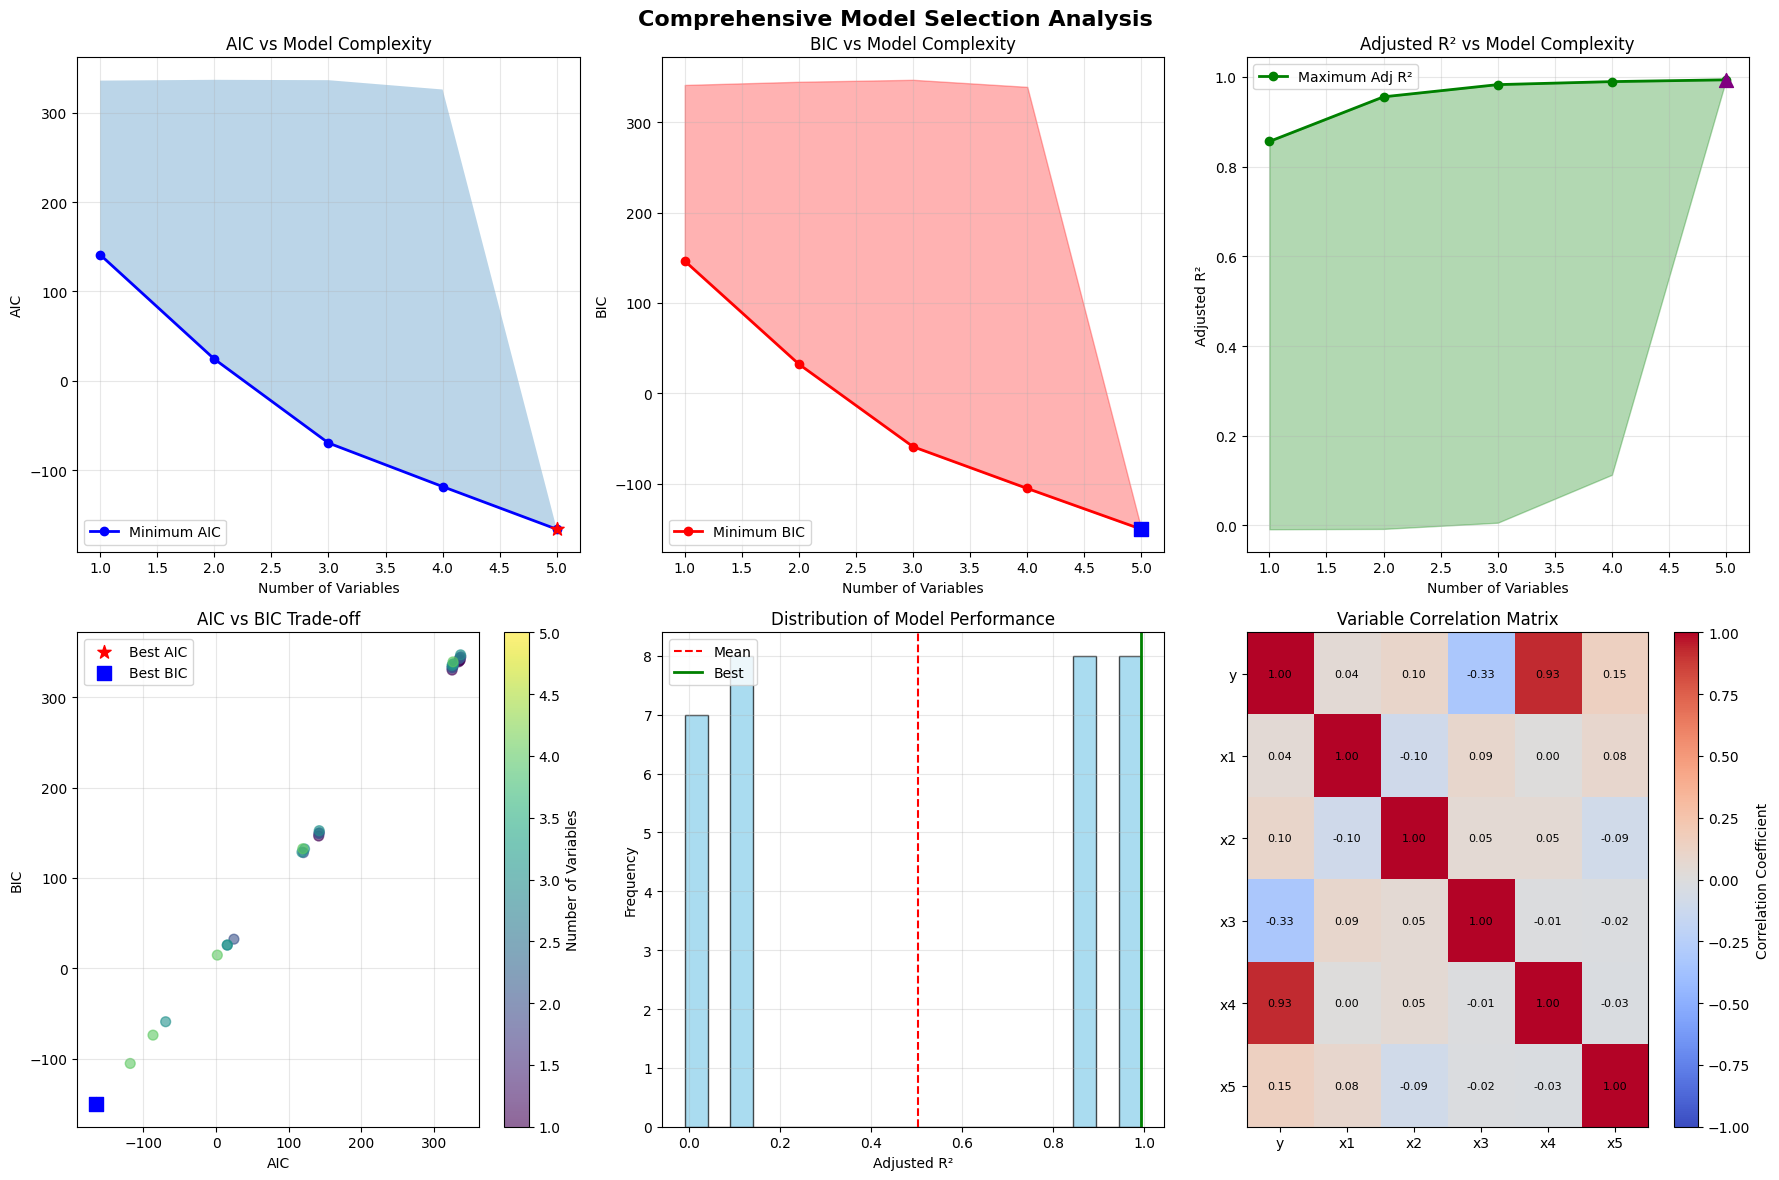

In [45]:
create_comprehensive_model_plots(results_df, data)

## Step 18: Final Recommendations
Summarize results and provide final model recommendations.

In [46]:
print(f"\n" + "="*80)
print("FINAL RECOMMENDATIONS")
print("="*80)
print(f"1. Based on the comprehensive model selection analysis:")
print(f" - AIC criterion selects: {best_models['AIC']['variables']}")
print(f" - BIC criterion selects: {best_models['BIC']['variables']}")
print(f" - Adjusted R² criterion selects: {best_models['Adj_R2']['variables']}")
print(f"\n2. Stepwise procedures:")
print(f" - Forward selection: {forward_vars}")
print(f" - Backward elimination: {backward_vars}")
print(f"\n3. Cross-validation performance:")
best_cv_model = max(cv_results.items(), key=lambda x: x[1]['cv_r2_mean'])
print(f" - Best CV performance: {best_cv_model[0]} (CV R² = {best_cv_model[1]['cv_r2_mean']:.4f})")
print(f"\n4. Recommended model: {final_model_vars}")
print(f" - This model balances goodness of fit with parsimony")
print(f" - BIC criterion helps avoid overfitting")
print(f" - Model performance: R² = {final_metrics['r_squared']:.4f}, Adj R² = {final_metrics['adj_r_squared']:.4f}")
print(f"\nModel selection analysis completed successfully!")
print(f"Comprehensive plots saved as: comprehensive_model_selection_analysis.png")


FINAL RECOMMENDATIONS
1. Based on the comprehensive model selection analysis:
 - AIC criterion selects: ['x1', 'x2', 'x3', 'x4', 'x5']
 - BIC criterion selects: ['x1', 'x2', 'x3', 'x4', 'x5']
 - Adjusted R² criterion selects: ['x1', 'x2', 'x3', 'x4', 'x5']

2. Stepwise procedures:
 - Forward selection: ['x4', 'x3', 'x5', 'x2', 'x1']
 - Backward elimination: ['x1', 'x2', 'x3', 'x4', 'x5']

3. Cross-validation performance:
 - Best CV performance: AIC Best (CV R² = 0.9893)

4. Recommended model: ['x1', 'x2', 'x3', 'x4', 'x5']
 - This model balances goodness of fit with parsimony
 - BIC criterion helps avoid overfitting
 - Model performance: R² = 0.9939, Adj R² = 0.9936

Model selection analysis completed successfully!
Comprehensive plots saved as: comprehensive_model_selection_analysis.png


# Problem 5: Time Series Stationarity and Unit Root Testing

## Step 1: Import Libraries
Import required Python libraries for time series analysis, data retrieval, and visualization.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from datetime import datetime, timedelta
np.random.seed(42)

## Step 2: Explain Stationarity
Define a function to print an explanation of stationarity and unit root testing.

In [48]:
def explain_stationarity():
    print("Part 5a: Stationarity in Time Series Models")
    print("===========================================")
    print("\nStationarity Definition:")
    print("A time series is stationary if its statistical properties (mean, variance, autocorrelation)")
    print("remain constant over time. Specifically, a strictly stationary series requires that the")
    print("joint distribution of observations is invariant to time shifts, while a weakly stationary")
    print("series requires constant mean, constant variance, and autocovariance that depends only on")
    print("the time lag between observations, not on the actual time.")
    print("\nImportance of Stationarity:")
    print("1. Many time series models (like ARMA) assume stationarity")
    print("2. Non-stationary data can lead to spurious regressions")
    print("3. Forecasts from non-stationary series may be unreliable")
    print("4. Statistical tests and confidence intervals may be invalid for non-stationary data")
    print("\nUnit Root Testing:")
    print("A unit root is a feature of non-stationary processes that makes them unpredictable.")
    print("If a time series has a unit root, it means that the process has a root equal to 1 in")
    print("its characteristic equation, indicating that shocks to the system persist indefinitely.")
    print("\nCommon Unit Root Tests:")
    print("1. Augmented Dickey-Fuller (ADF) Test:")
    print("   - Null hypothesis: Series has a unit root (non-stationary)")
    print("   - Alternative hypothesis: Series is stationary")
    print("   - If p-value < significance level (e.g., 0.05), reject null hypothesis")
    print("\n2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:")
    print("   - Null hypothesis: Series is stationary")
    print("   - Alternative hypothesis: Series has a unit root (non-stationary)")
    print("   - If p-value < significance level, reject null hypothesis")
    print("\n3. Phillips-Perron (PP) Test:")
    print("   - Similar to ADF but with different handling of serial correlation")
    print("\nHandling Unit Roots:")
    print("If a unit root is found, common approaches include:")
    print("1. Differencing: Calculate period-to-period changes (first differences)")
    print("2. Seasonal differencing: For seasonal data")
    print("3. Log transformation followed by differencing")
    print("4. Detrending: Removing deterministic trends")
    print("5. Using models designed for non-stationary data (e.g., ARIMA)")

## Step 3: Analyze Equity Data
Define a function to download and analyze S&P 500 data for unit root testing.

In [49]:
def analyze_equity_data():
    print("\n\nPart 5b: Unit Root Testing with Real Equity Data")
    print("===============================================")
    end_date = datetime.now()
    start_date = end_date - timedelta(days=5*365)
    print(f"\nDownloading S&P 500 (^GSPC) data from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    print("\nData Overview:")
    print(f"Number of observations: {len(sp500)}")
    print(f"Date range: {sp500.index.min().strftime('%Y-%m-%d')} to {sp500.index.max().strftime('%Y-%m-%d')}")
    print("\nFirst few rows:")
    print(sp500.head())
    plt.figure(figsize=(12, 6))
    plt.plot(sp500.index, sp500['Close'], label='S&P 500 Close Price')
    plt.title('S&P 500 Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.savefig('sp500_price.png')
    sp500['Log_Return'] = np.log(sp500['Close']).diff()
    plt.figure(figsize=(12, 6))
    plt.plot(sp500.index[1:], sp500['Log_Return'][1:], label='S&P 500 Log Returns')
    plt.title('S&P 500 Log Returns')
    plt.xlabel('Date')
    plt.ylabel('Log Return')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.savefig('sp500_returns.png')
    print("\nAugmented Dickey-Fuller Test on Price Levels:")
    adf_price = adfuller(sp500['Close'].dropna())
    print(f"ADF Statistic: {adf_price[0]:.4f}")
    print(f"p-value: {adf_price[1]:.4f}")
    print("Critical Values:")
    for key, value in adf_price[4].items():
        print(f"   {key}: {value:.4f}")
    if adf_price[1] > 0.05:
        print("Conclusion: Failed to reject the null hypothesis. The price series has a unit root (non-stationary).")
    else:
        print("Conclusion: Rejected the null hypothesis. The price series is stationary.")
    print("\nKPSS Test on Price Levels:")
    kpss_price = kpss(sp500['Close'].dropna())
    print(f"KPSS Statistic: {kpss_price[0]:.4f}")
    print(f"p-value: {kpss_price[1]:.4f}")
    print("Critical Values:")
    for key, value in kpss_price[3].items():
        print(f"   {key}: {value:.4f}")
    if kpss_price[1] < 0.05:
        print("Conclusion: Rejected the null hypothesis. The price series is non-stationary.")
    else:
        print("Conclusion: Failed to reject the null hypothesis. The price series is stationary.")
    print("\nAugmented Dickey-Fuller Test on Log Returns:")
    adf_returns = adfuller(sp500['Log_Return'].dropna())
    print(f"ADF Statistic: {adf_returns[0]:.4f}")
    print(f"p-value: {adf_returns[1]:.4f}")
    print("Critical Values:")
    for key, value in adf_returns[4].items():
        print(f"   {key}: {value:.4f}")
    if adf_returns[1] > 0.05:
        print("Conclusion: Failed to reject the null hypothesis. The returns series has a unit root (non-stationary).")
    else:
        print("Conclusion: Rejected the null hypothesis. The returns series is stationary.")
    print("\nKPSS Test on Log Returns:")
    kpss_returns = kpss(sp500['Log_Return'].dropna())
    print(f"KPSS Statistic: {kpss_returns[0]:.4f}")
    print(f"p-value: {kpss_returns[1]:.4f}")
    print("Critical Values:")
    for key, value in kpss_returns[3].items():
        print(f"   {key}: {value:.4f}")
    if kpss_returns[1] < 0.05:
        print("Conclusion: Rejected the null hypothesis. The returns series is non-stationary.")
    else:
        print("Conclusion: Failed to reject the null hypothesis. The returns series is stationary.")
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    plot_acf(sp500['Close'].dropna(), ax=axes[0], title='ACF of S&P 500 Price Levels')
    plot_pacf(sp500['Close'].dropna(), ax=axes[1], title='PACF of S&P 500 Price Levels')
    plt.tight_layout()
    plt.savefig('acf_pacf_price.png')
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    plot_acf(sp500['Log_Return'].dropna(), ax=axes[0], title='ACF of S&P 500 Log Returns')
    plot_pacf(sp500['Log_Return'].dropna(), ax=axes[1], title='PACF of S&P 500 Log Returns')
    plt.tight_layout()
    plt.savefig('acf_pacf_returns.png')
    return sp500

## Step 4: Simulate Time Series
Define a function to simulate and compare time series with different roots.

In [50]:
def simulate_time_series():
    print("\n\nPart 5c: Understanding Unit Root vs. Other Roots")
    print("==============================================")
    n_periods = 200
    np.random.seed(42)
    y_unit_root = np.zeros(n_periods)
    y_unit_root[0] = 0
    for t in range(1, n_periods):
        y_unit_root[t] = y_unit_root[t-1] + np.random.normal(0, 1)
    y_explosive = np.zeros(n_periods)
    y_explosive[0] = 0
    for t in range(1, n_periods):
        y_explosive[t] = 1.5 * y_explosive[t-1] + np.random.normal(0, 1)
    y_stationary = np.zeros(n_periods)
    y_stationary[0] = 0
    for t in range(1, n_periods):
        y_stationary[t] = 0.5 * y_stationary[t-1] + np.random.normal(0, 1)
    plt.figure(figsize=(12, 8))
    plt.plot(range(n_periods), y_unit_root, label='Unit Root (phi = 1)')
    plt.plot(range(n_periods), y_stationary, label='Stationary (phi = 0.5)')
    plt.title('Comparison of Time Series with Different Roots')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('unit_root_comparison.png')
    plt.figure(figsize=(12, 6))
    plt.plot(range(n_periods), y_explosive, label='Explosive (phi = 1.5)', color='red')
    plt.title('Time Series with Explosive Root (phi = 1.5)')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('explosive_series.png')
    print("\nAugmented Dickey-Fuller Test Results:")
    adf_unit_root = adfuller(y_unit_root)
    print("\nUnit Root Series (phi = 1):")
    print(f"ADF Statistic: {adf_unit_root[0]:.4f}")
    print(f"p-value: {adf_unit_root[1]:.4f}")
    adf_explosive = adfuller(y_explosive)
    print("\nExplosive Series (phi = 1.5):")
    print(f"ADF Statistic: {adf_explosive[0]:.4f}")
    print(f"p-value: {adf_explosive[1]:.4f}")
    adf_stationary = adfuller(y_stationary)
    print("\nStationary Series (phi = 0.5):")
    print(f"ADF Statistic: {adf_stationary[0]:.4f}")
    print(f"p-value: {adf_stationary[1]:.4f}")
    window_size = 20
    var_unit_root = [np.var(y_unit_root[max(0, i-window_size):i+1]) for i in range(window_size, n_periods)]
    var_explosive = [np.var(y_explosive[max(0, i-window_size):i+1]) for i in range(window_size, n_periods)]
    var_stationary = [np.var(y_stationary[max(0, i-window_size):i+1]) for i in range(window_size, n_periods)]
    plt.figure(figsize=(12, 6))
    plt.plot(range(window_size, n_periods), var_unit_root, label='Unit Root (phi = 1)')
    plt.plot(range(window_size, n_periods), var_stationary, label='Stationary (phi = 0.5)')
    plt.title('Rolling Variance of Different Time Series')
    plt.xlabel('Time')
    plt.ylabel('Variance (20-period window)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('variance_comparison.png')
    plt.figure(figsize=(12, 6))
    plt.plot(range(window_size, n_periods), var_explosive, label='Explosive (phi = 1.5)', color='red')
    plt.title('Rolling Variance of Explosive Time Series')
    plt.xlabel('Time')
    plt.ylabel('Variance (20-period window)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('explosive_variance.png')
    print("\nWhy Economics and Finance Focus on Unit Roots:")
    print("1. Persistence of Shocks: In a unit root process, shocks persist indefinitely,")
    print("   while in a stationary process (|phi| < 1), shocks decay over time.")
    print("2. Unpredictability: Unit root processes are much harder to forecast accurately")
    print("   because past shocks never fade away.")
    print("3. Spurious Regression: Regressions involving non-stationary variables can show")
    print("   significant relationships even when none exist.")
    print("4. Policy Implications: If economic variables have unit roots, temporary policy")
    print("   interventions can have permanent effects.")
    print("5. Theoretical Consistency: Many economic theories suggest that certain variables")
    print("   should be non-stationary (e.g., efficient market hypothesis).")
    print("\nWhy Not Worry About Roots > 1:")
    print("1. Explosive Behavior: As shown in our simulation, processes with roots > 1 grow")
    print("   exponentially and quickly reach implausible values.")
    print("2. Economic Constraints: Real economic systems have natural or imposed constraints")
    print("   that prevent truly explosive behavior over long periods.")
    print("3. Mean Reversion: Market forces and policy interventions typically act to")
    print("   counteract explosive trends.")
    print("4. Rarity in Data: Explosive processes are rarely observed in actual economic data")
    print("   over extended periods.")
    print("5. Theoretical Inconsistency: Most economic theories do not predict explosive")
    print("   behavior as a long-term equilibrium state.")

## Step 5: Run Stationarity Explanation
Execute the function to display the explanation of stationarity and unit root testing.

In [51]:
explain_stationarity()

Part 5a: Stationarity in Time Series Models

Stationarity Definition:
A time series is stationary if its statistical properties (mean, variance, autocorrelation)
remain constant over time. Specifically, a strictly stationary series requires that the
joint distribution of observations is invariant to time shifts, while a weakly stationary
series requires constant mean, constant variance, and autocovariance that depends only on
the time lag between observations, not on the actual time.

Importance of Stationarity:
1. Many time series models (like ARMA) assume stationarity
2. Non-stationary data can lead to spurious regressions
3. Forecasts from non-stationary series may be unreliable
4. Statistical tests and confidence intervals may be invalid for non-stationary data

Unit Root Testing:
A unit root is a feature of non-stationary processes that makes them unpredictable.
If a time series has a unit root, it means that the process has a root equal to 1 in
its characteristic equation, indica

## Step 6: Analyze S&P 500 Data
Download and analyze S&P 500 data, performing unit root tests and generating plots.



Part 5b: Unit Root Testing with Real Equity Data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



Data Overview:
Number of observations: 1255
Date range: 2020-06-15 to 2025-06-11

First few rows:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2020-06-15  3066.590088  3079.760010  2965.659912  2993.760010  5757480000
2020-06-16  3124.739990  3153.449951  3076.060059  3131.000000  5845810000
2020-06-17  3113.489990  3141.159912  3108.030029  3136.129883  4560450000
2020-06-18  3115.340088  3120.000000  3093.510010  3101.639893  4448690000
2020-06-19  3097.739990  3155.530029  3083.110107  3140.290039  8346650000

Augmented Dickey-Fuller Test on Price Levels:
ADF Statistic: -0.8936
p-value: 0.7901
Critical Values:
   1%: -3.4356
   5%: -2.8639
   10%: -2.5680
Conclusion: Failed to reject the null hypothesis. The price series has a unit root (non-stationary).

KPSS Test on Price Levels:
KPSS Statistic: 4.3661


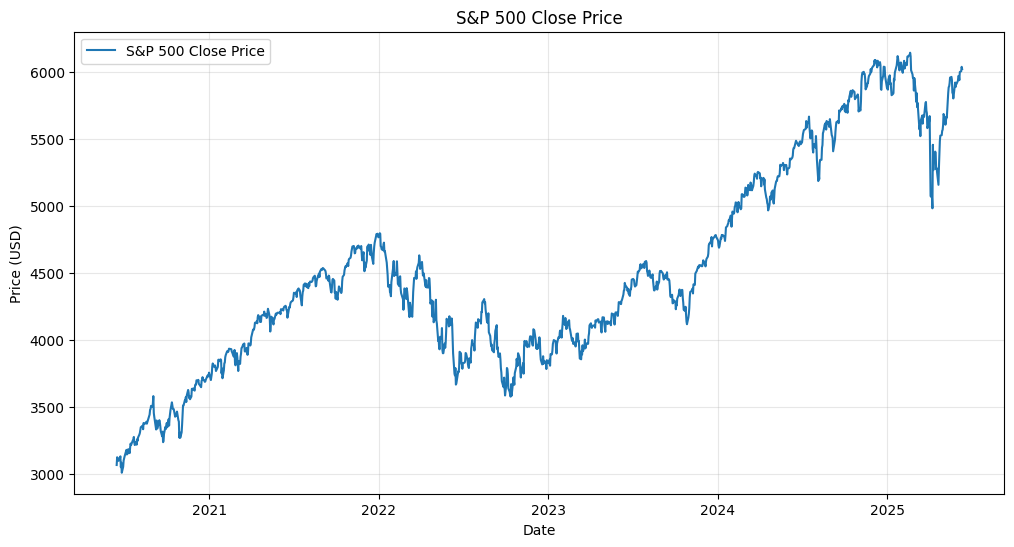

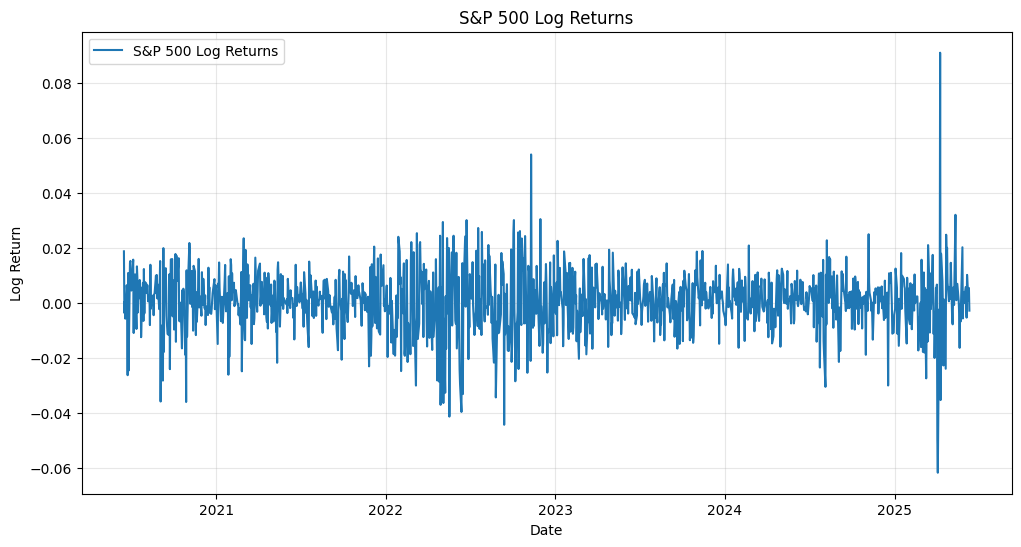

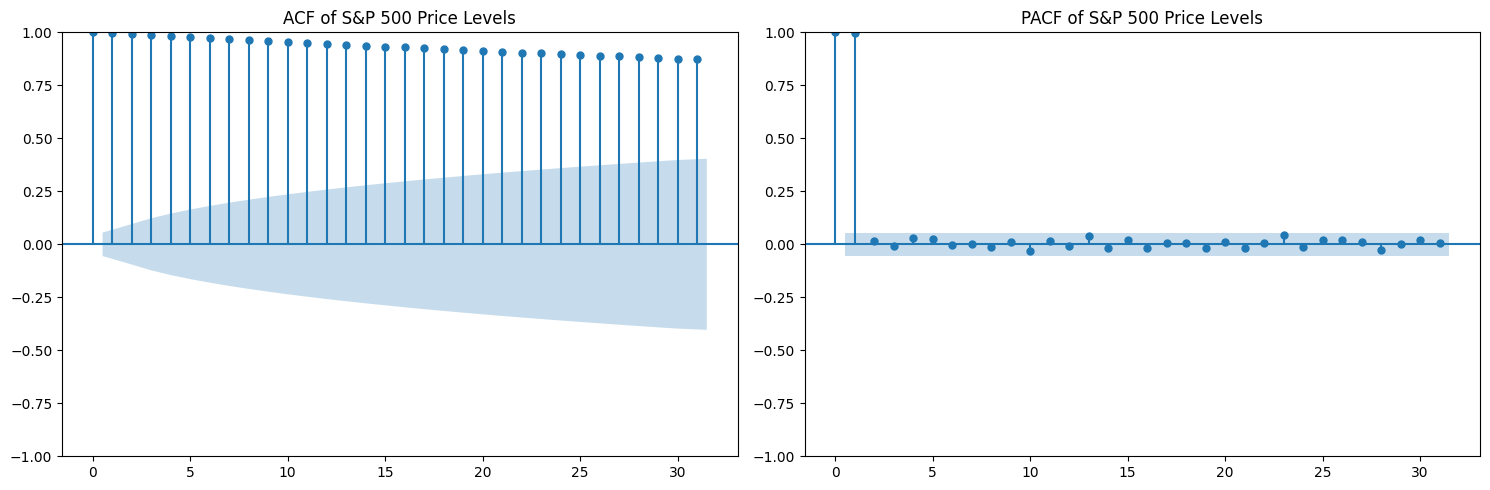

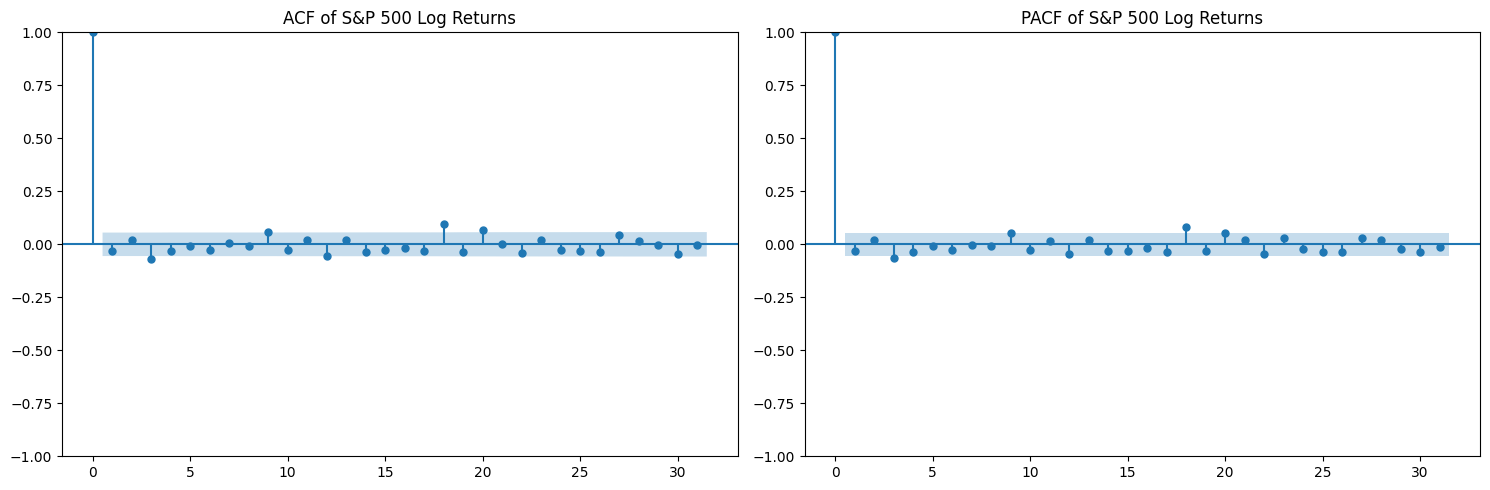

In [52]:
sp500_data = analyze_equity_data()

## Step 7: Simulate and Compare Time Series
Simulate time series with different roots, test for stationarity, and visualize results.



Part 5c: Understanding Unit Root vs. Other Roots

Augmented Dickey-Fuller Test Results:

Unit Root Series (phi = 1):
ADF Statistic: -2.1910
p-value: 0.2095

Explosive Series (phi = 1.5):
ADF Statistic: 38800475173350072.0000
p-value: 1.0000

Stationary Series (phi = 0.5):
ADF Statistic: -7.8144
p-value: 0.0000

Why Economics and Finance Focus on Unit Roots:
1. Persistence of Shocks: In a unit root process, shocks persist indefinitely,
   while in a stationary process (|phi| < 1), shocks decay over time.
2. Unpredictability: Unit root processes are much harder to forecast accurately
   because past shocks never fade away.
3. Spurious Regression: Regressions involving non-stationary variables can show
   significant relationships even when none exist.
4. Policy Implications: If economic variables have unit roots, temporary policy
   interventions can have permanent effects.
5. Theoretical Consistency: Many economic theories suggest that certain variables
   should be non-stationary (e.

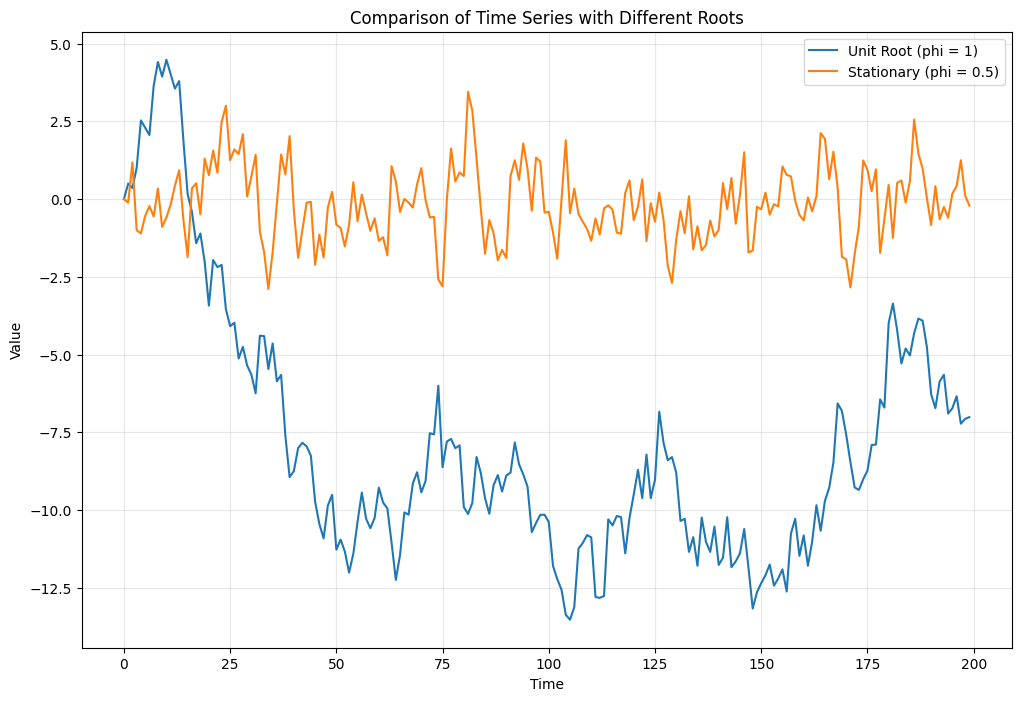

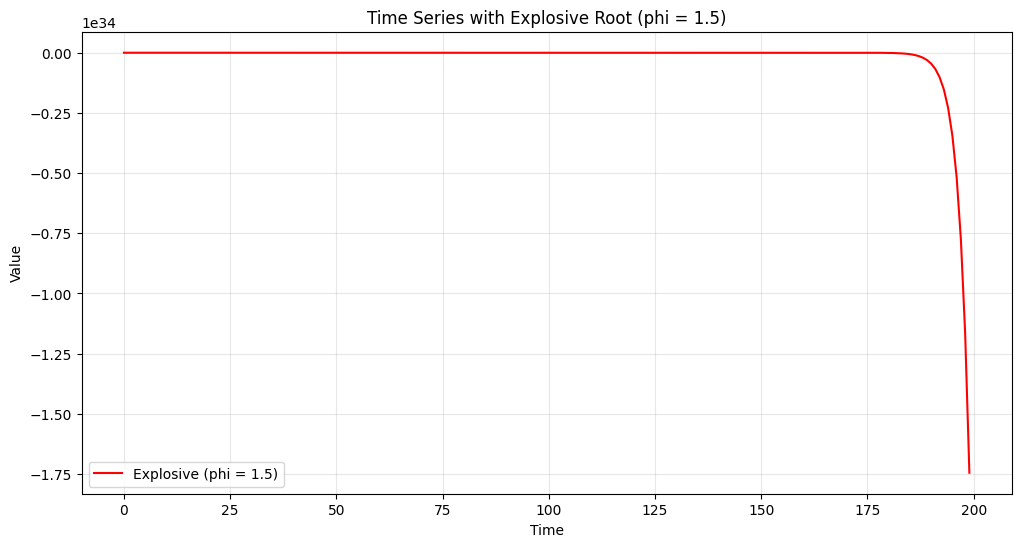

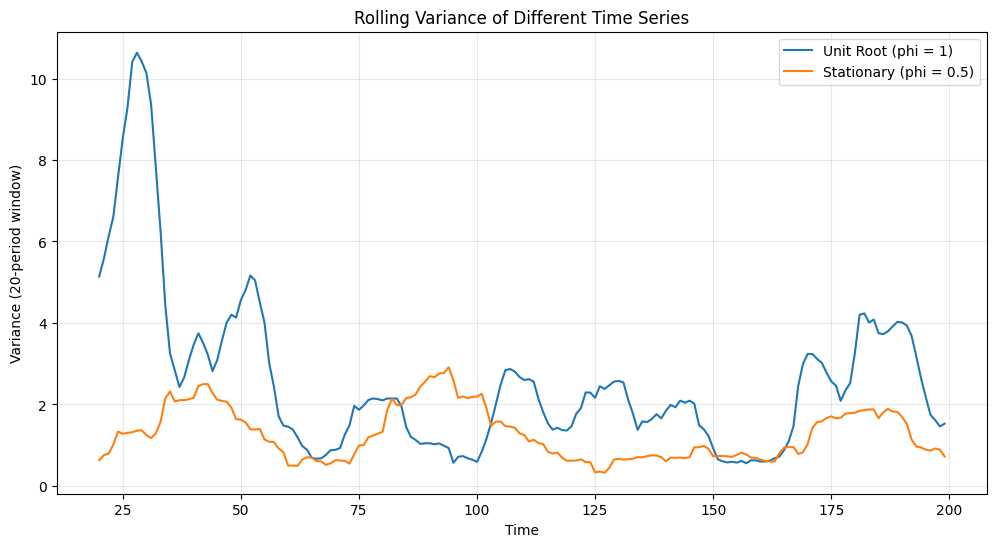

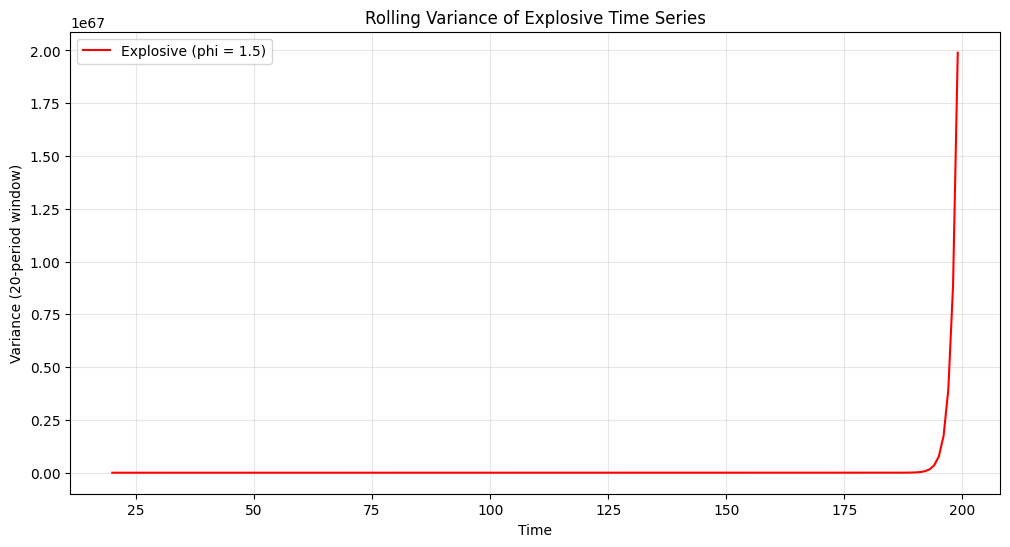

In [53]:
simulate_time_series()

# Problem 6:  Testing for Structural Breaks

## Step 1: Import Libraries

Import required Python libraries for data generation, regression analysis, and visualization.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
np.random.seed(42)

## Step 2: Define Data Generation Function

Define a function to generate synthetic data with a structural break at t=10.

In [55]:
def generate_data_with_structural_break():
    n = 20
    t = np.arange(1, n+1)
    X = np.random.normal(0, 1, n)
    alpha = 2.0
    beta1 = 1.5
    beta2 = 3.0
    epsilon = np.random.normal(0, 0.5, n)
    Y = np.zeros(n)
    for i in range(n):
        if i < 10:
            Y[i] = alpha + beta1 * X[i] + epsilon[i]
        else:
            Y[i] = alpha + beta2 * X[i] + epsilon[i]
    D = np.zeros(n)
    D[10:] = 1
    DX = D * X
    data = pd.DataFrame({
        't': t,
        'X': X,
        'Y': Y,
        'D': D,
        'DX': DX
    })
    return data, alpha, beta1, beta2

## Step 3: Define Structural Break Testing Function

Define a function to test for a structural break using a dummy variable approach.

In [56]:
def test_structural_break():
    data, true_alpha, true_beta1, true_beta2 = generate_data_with_structural_break()
    print("Simulated Data:")
    print(data)
    model_no_break = ols('Y ~ X', data=data).fit()
    model_with_break = ols('Y ~ X + D + DX', data=data).fit()
    print("\nModel without Structural Break:")
    print(model_no_break.summary().tables[1])
    print("\nModel with Structural Break:")
    print(model_with_break.summary().tables[1])
    alpha_hat = model_with_break.params['Intercept']
    beta1_hat = model_with_break.params['X']
    beta2_hat = model_with_break.params['X'] + model_with_break.params['DX']
    print("\nParameter Comparison:")
    print(f"True alpha: {true_alpha:.4f}, Estimated alpha: {alpha_hat:.4f}")
    print(f"True beta1 (t <= 10): {true_beta1:.4f}, Estimated beta1: {beta1_hat:.4f}")
    print(f"True beta2 (t > 10): {true_beta2:.4f}, Estimated beta2: {beta2_hat:.4f}")
    print("\nTesting for Structural Break:")
    print(f"Coefficient of DX: {model_with_break.params['DX']:.4f}")
    print(f"p-value: {model_with_break.pvalues['DX']:.4f}")
    if model_with_break.pvalues['DX'] < 0.05:
        print("Conclusion: There is significant evidence of a structural break in the beta parameter.")
    else:
        print("Conclusion: There is no significant evidence of a structural break in the beta parameter.")
    plt.figure(figsize=(12, 8))
    plt.scatter(data.loc[data['D'] == 0, 'X'], data.loc[data['D'] == 0, 'Y'], color='blue', label='Data (t <= 10)')
    plt.scatter(data.loc[data['D'] == 1, 'X'], data.loc[data['D'] == 1, 'Y'], color='red', label='Data (t > 10)')
    X_range = np.linspace(min(data['X']), max(data['X']), 100)
    Y_no_break = model_no_break.params['Intercept'] + model_no_break.params['X'] * X_range
    plt.plot(X_range, Y_no_break, 'g--', label='Model without Break')
    X_range1 = np.linspace(min(data.loc[data['D'] == 0, 'X']), max(data.loc[data['D'] == 0, 'X']), 100)
    Y_break1 = alpha_hat + beta1_hat * X_range1
    plt.plot(X_range1, Y_break1, 'b-', label='Model with Break (t <= 10)')
    X_range2 = np.linspace(min(data.loc[data['D'] == 1, 'X']), max(data.loc[data['D'] == 1, 'X']), 100)
    Y_break2 = alpha_hat + beta2_hat * X_range2
    plt.plot(X_range2, Y_break2, 'r-', label='Model with Break (t > 10)')
    plt.title('Structural Break Analysis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('structural_break.png')
    print("\nExplanation of the Approach:")
    print("To test for a structural break in the beta parameter at t=10, we use a dummy variable approach:")
    print("1. Create a dummy variable D that equals 0 for t <= 10 and 1 for t > 10")
    print("2. Create an interaction term DX = D * X")
    print("3. Estimate the model: Y = α + β₁X + γD + δDX + ε")
    print("4. In this model:")
    print("   - α is the intercept")
    print("   - β₁ is the slope coefficient for t <= 10")
    print("   - γ is the change in intercept after t=10")
    print("   - δ is the change in slope coefficient after t=10")
    print("   - The slope coefficient for t > 10 is β₂ = β₁ + δ")
    print("5. Test the significance of δ (coefficient of DX):")
    print("   - If δ is statistically significant, there is evidence of a structural break in the slope")
    print("\nAlternative Approaches:")
    print("1. Chow Test: Split the sample at t=10 and compare the sum of squared residuals")
    print("2. CUSUM Test: Cumulative sum of recursive residuals to detect structural changes")
    print("3. Quandt Likelihood Ratio (QLR) Test: Tests for breaks at unknown points")
    print("4. Bai-Perron Test: Tests for multiple structural breaks")

## Step 4: Run Structural Break Analysis

Execute the structural break test and visualization.

Simulated Data:
     t         X         Y    D        DX
0    1  0.496714  3.477896  0.0  0.000000
1    2 -0.138264  1.679715  0.0 -0.000000
2    3  0.647689  3.005297  0.0  0.000000
3    4  1.523030  3.572171  0.0  0.000000
4    5 -0.234153  1.376579  0.0 -0.000000
5    6 -0.234137  1.704256  0.0 -0.000000
6    7  1.579213  3.793322  0.0  0.000000
7    8  0.767435  3.339001  0.0  0.000000
8    9 -0.469474  0.995469  0.0 -0.000000
9   10  0.542560  2.667993  0.0  0.000000
10  11 -0.463418  0.308894  1.0 -0.463418
11  12 -0.465730  1.528950  1.0 -0.465730
12  13  0.241962  2.719138  1.0  0.241962
13  14 -1.913280 -4.268696  1.0 -1.913280
14  15 -1.724918 -2.763481  1.0 -1.724918
15  16 -0.562288 -0.297284  1.0 -0.562288
16  17 -1.012831 -0.934062  1.0 -1.012831
17  18  0.314247  1.962907  1.0  0.314247
18  19 -0.908024 -1.388165  1.0 -0.908024
19  20 -1.412304 -2.138480  1.0 -1.412304

Model without Structural Break:
                 coef    std err          t      P>|t|      [0.025   

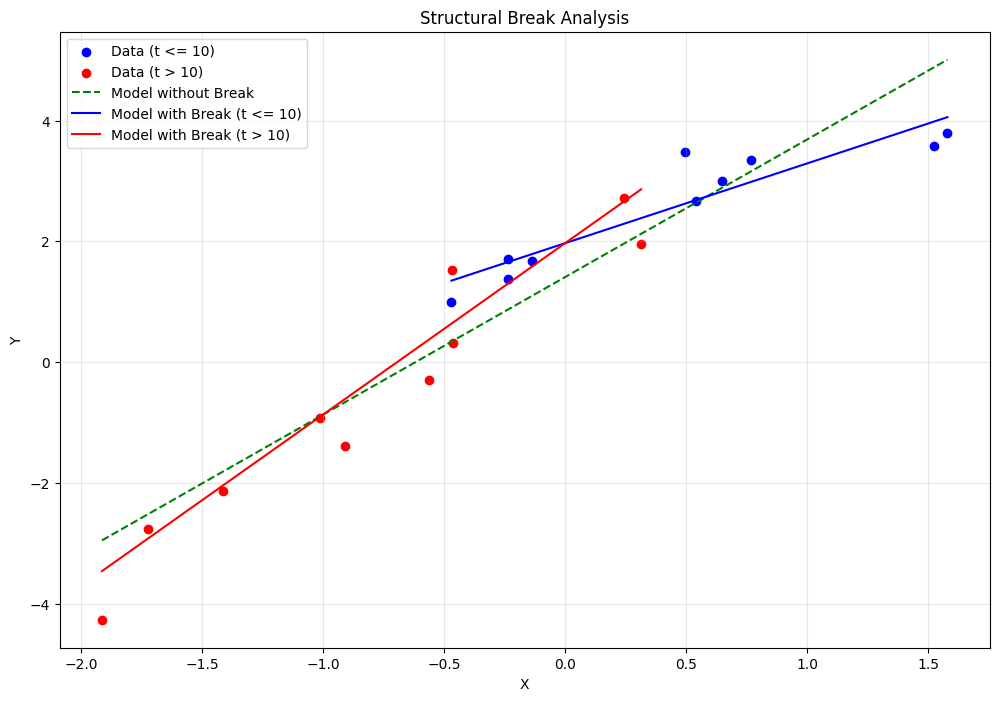

In [57]:
test_structural_break()